In [1]:
# 기본 라이브러리 임포트
import pandas as pd             
import numpy as np             
import matplotlib.pyplot as plt 
import seaborn as sns           
import gc                       # 가비지 컬렉션(메모리 해제)
import re                       # 정규 표현식 처리
from collections import defaultdict  # 기본값이 있는 딕셔너리 생성

# 경고 메시지 억제
import warnings
warnings.filterwarnings('ignore')   

# 그래프 스타일 설정
sns.set()                           # seaborn 기본 스타일 적용

# matplotlib 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
# plt.rcParams['font.family'] = 'AppleGothic'  
plt.rcParams['figure.figsize'] = (12, 6)       # 그림 크기 설정 (가로, 세로)
plt.rcParams['font.size'] = 14                 # 폰트 크기 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 결측치 시각화 라이브러리 임포트
import missingno                          # 결측치 분포를 시각화하는 유틸리티

# 범주형 변수 레이블 인코딩을 위한 도구 임포트
from sklearn.preprocessing import LabelEncoder

# 중복 조합 생성에 사용할 product 함수 임포트
from itertools import product

# 회귀 및 통계 분석을 위한 statsmodels 임포트
import statsmodels.api as sm

In [2]:
df2 = pd.read_parquet('마케팅정보_전처리.parquet')
df2

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_CA_청구서_B0M,컨택건수_이용유도_청구서_B0M,...,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,Segment,캠페인접촉일수_R12M_num,캠페인접촉건수_R12M_num
0,201807,TRAIN_000000,0,0,0,0,2,13,0,0,...,57,0,0,0,2,0,0,D,1,1
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,2,2,2,1,6,0,0,E,10,15
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,12,0,0,1,3,0,0,C,1,1
3,201807,TRAIN_000003,0,0,0,0,2,13,0,1,...,35,0,0,2,0,0,0,D,1,1
4,201807,TRAIN_000004,0,0,0,0,3,0,0,1,...,0,0,0,4,1,0,0,E,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,None,1,1
2999996,201812,TEST_99996,0,0,0,0,0,2,0,0,...,9,0,0,0,3,0,0,None,1,1
2999997,201812,TEST_99997,0,3,0,0,2,1,0,0,...,12,0,0,0,1,0,0,None,1,1
2999998,201812,TEST_99998,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,None,5,5


### EDA
- 대부분의 값이 0에 몰려 있기 때문에, 0과 0이 아닌 값을 구분하여 분석을 진행

,비0 비율(%)
컨택건수_카드론_TM_B0M,5.400567
컨택건수_이용유도_LMS_B0M,31.662667
컨택건수_이용유도_EM_B0M,30.894133
컨택건수_이용유도_청구서_B0M,29.470500
컨택건수_이용유도_인터넷_B0M,19.760533
컨택건수_카드론_TM_R6M,23.332633
컨택건수_이용유도_TM_R6M,34.011333
컨택건수_보험_TM_R6M,26.352233
컨택건수_카드론_LMS_R6M,8.489367
컨택건수_CA_LMS_R6M,13.936200


,비0 비율(%)
컨택건수_카드론_TM_B0M,5.400567


,컨택건수_카드론_TM_B0M 비0 그룹 통계
count,162017.000000
mean,3.078961
median,3.000000
std,0.270296
min,2.000000
max,4.000000


,컨택건수_카드론_TM_B0M 비0 비율(%)
Segment,
A,2.160494
B,3.472222
C,4.523082
D,5.455816
E,5.430654


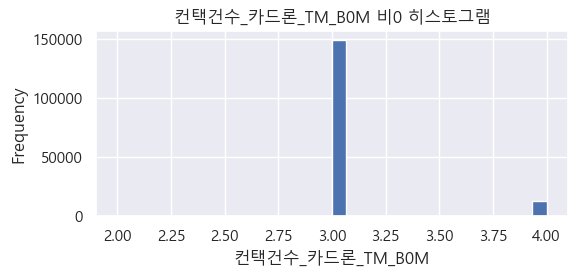

,비0 비율(%)
컨택건수_이용유도_LMS_B0M,31.662667


,컨택건수_이용유도_LMS_B0M 비0 그룹 통계
count,949880.000000
mean,2.060728
median,2.000000
std,0.264176
min,1.000000
max,3.000000


,컨택건수_이용유도_LMS_B0M 비0 비율(%)
Segment,
A,44.444444
B,65.277778
C,36.964496
D,35.678985
E,30.555313


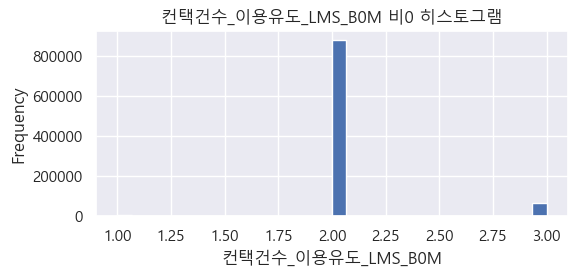

,비0 비율(%)
컨택건수_이용유도_EM_B0M,30.894133


,컨택건수_이용유도_EM_B0M 비0 그룹 통계
count,926824.000000
mean,5.944310
median,2.000000
std,5.433764
min,1.000000
max,14.000000


,컨택건수_이용유도_EM_B0M 비0 비율(%)
Segment,
A,47.427984
B,68.055556
C,45.396975
D,44.048253
E,27.504407


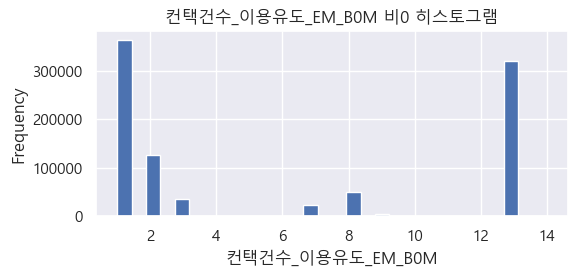

,비0 비율(%)
컨택건수_이용유도_청구서_B0M,29.4705


,컨택건수_이용유도_청구서_B0M 비0 그룹 통계
count,884115.000000
mean,1.076643
median,1.000000
std,0.266024
min,1.000000
max,2.000000


,컨택건수_이용유도_청구서_B0M 비0 비율(%)
Segment,
A,37.551440
B,37.500000
C,32.676542
D,33.473351
E,28.573420


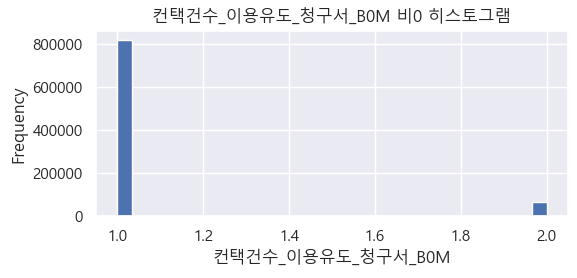

,비0 비율(%)
컨택건수_이용유도_인터넷_B0M,19.760533


,컨택건수_이용유도_인터넷_B0M 비0 그룹 통계
count,592816.0
mean,1.0
median,1.0
std,0.0
min,1.0
max,1.0


,컨택건수_이용유도_인터넷_B0M 비0 비율(%)
Segment,
A,21.090535
B,12.500000
C,17.690258
D,19.419199
E,19.942384


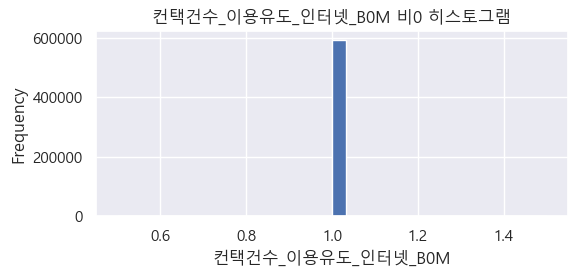

,비0 비율(%)
컨택건수_카드론_TM_R6M,23.332633


,컨택건수_카드론_TM_R6M 비0 그룹 통계
count,699979.000000
mean,7.883281
median,7.000000
std,3.346521
min,1.000000
max,24.000000


,컨택건수_카드론_TM_R6M 비0 비율(%)
Segment,
A,16.358025
B,22.222222
C,17.930089
D,20.853162
E,24.116881


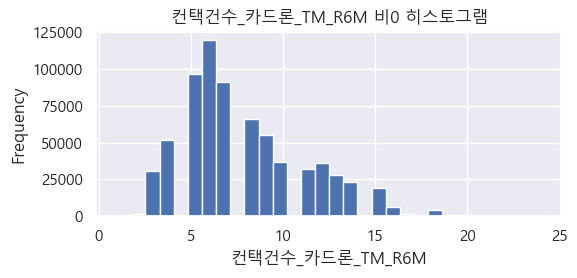

,비0 비율(%)
컨택건수_이용유도_TM_R6M,34.011333


,컨택건수_이용유도_TM_R6M 비0 그룹 통계
count,1.020340e+06
mean,3.355594e+00
median,3.000000e+00
std,2.023445e+00
min,1.000000e+00
max,1.800000e+01


,컨택건수_이용유도_TM_R6M 비0 비율(%)
Segment,
A,8.744856
B,21.527778
C,16.187789
D,22.879837
E,37.238743


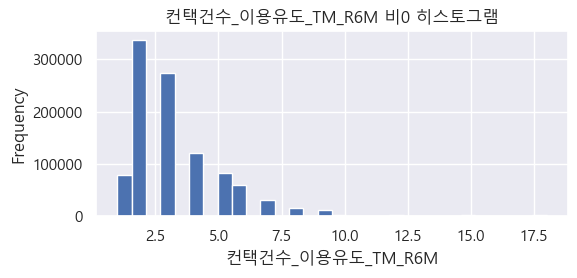

,비0 비율(%)
컨택건수_보험_TM_R6M,26.352233


,컨택건수_보험_TM_R6M 비0 그룹 통계
count,790567.000000
mean,1.904741
median,2.000000
std,0.746729
min,1.000000
max,6.000000


,컨택건수_보험_TM_R6M 비0 비율(%)
Segment,
A,21.296296
B,28.472222
C,21.313583
D,22.150830
E,27.431724


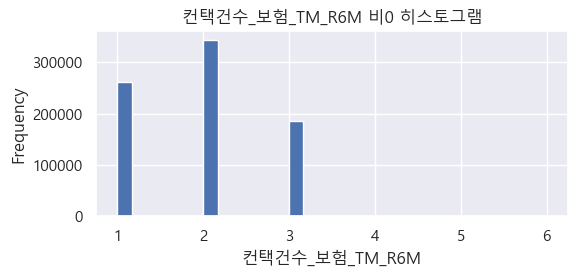

,비0 비율(%)
컨택건수_카드론_LMS_R6M,8.489367


,컨택건수_카드론_LMS_R6M 비0 그룹 통계
count,254681.000000
mean,1.083701
median,1.000000
std,0.382990
min,1.000000
max,6.000000


,컨택건수_카드론_LMS_R6M 비0 비율(%)
Segment,
A,3.086420
B,9.027778
C,5.514539
D,7.499098
E,8.855848


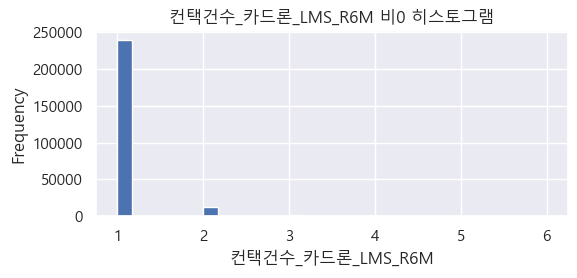

,비0 비율(%)
컨택건수_CA_LMS_R6M,13.9362


,컨택건수_CA_LMS_R6M 비0 그룹 통계
count,418086.000000
mean,1.999450
median,2.000000
std,0.024152
min,1.000000
max,4.000000


,컨택건수_CA_LMS_R6M 비0 비율(%)
Segment,
A,12.037037
B,11.111111
C,11.001646
D,13.872043
E,14.104249


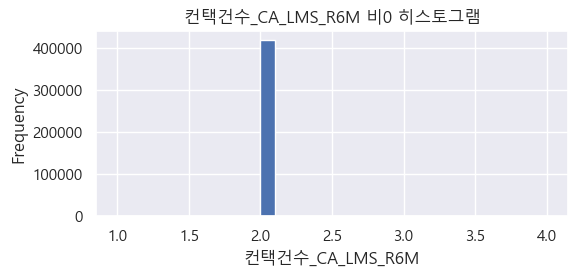

,비0 비율(%)
컨택건수_이용유도_LMS_R6M,53.818567


,컨택건수_이용유도_LMS_R6M 비0 그룹 통계
count,1.614557e+06
mean,6.556377e+00
median,6.000000e+00
std,3.860745e+00
min,1.000000e+00
max,2.100000e+01


,컨택건수_이용유도_LMS_R6M 비0 비율(%)
Segment,
A,54.115226
B,72.222222
C,52.421820
D,51.001598
E,54.374960


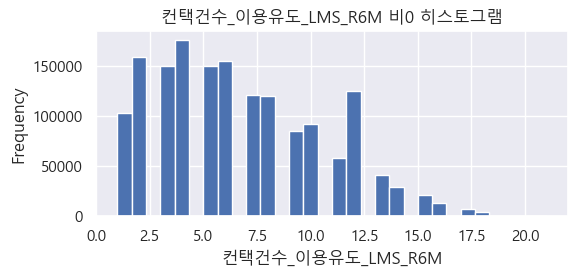

,비0 비율(%)
컨택건수_이용유도_EM_R6M,72.146833


,컨택건수_이용유도_EM_R6M 비0 그룹 통계
count,2.164405e+06
mean,1.739341e+01
median,6.000000e+00
std,2.137680e+01
min,1.000000e+00
max,7.900000e+01


,컨택건수_이용유도_EM_R6M 비0 비율(%)
Segment,
A,82.716049
B,90.277778
C,83.137393
D,83.461897
E,69.376427


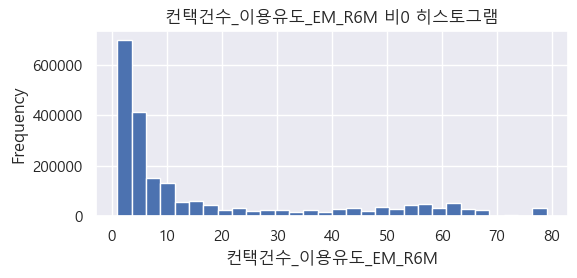

,비0 비율(%)
컨택건수_CA_청구서_R6M,10.050033


,컨택건수_CA_청구서_R6M 비0 그룹 통계
count,301501.000000
mean,2.022030
median,2.000000
std,0.331206
min,2.000000
max,12.000000


,컨택건수_CA_청구서_R6M 비0 비율(%)
Segment,
A,12.037037
B,10.416667
C,10.788463
D,11.660682
E,9.700206


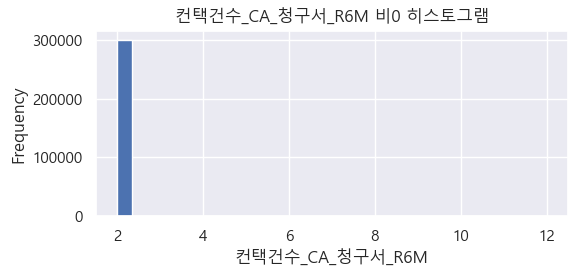

,비0 비율(%)
컨택건수_이용유도_청구서_R6M,51.595467


,컨택건수_이용유도_청구서_R6M 비0 그룹 통계
count,1.547864e+06
mean,3.571369e+00
median,4.000000e+00
std,1.990190e+00
min,1.000000e+00
max,1.200000e+01


,컨택건수_이용유도_청구서_R6M 비0 비율(%)
Segment,
A,48.662551
B,40.277778
C,44.547378
D,52.951821
E,51.846932


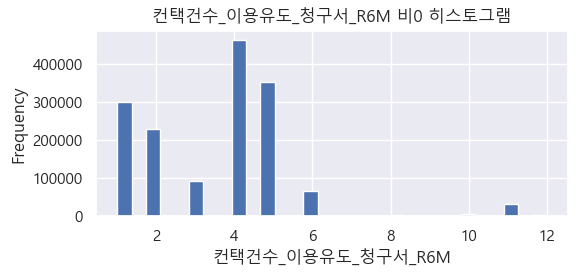

,비0 비율(%)
컨택건수_이용유도_인터넷_R6M,66.7491


,컨택건수_이용유도_인터넷_R6M 비0 그룹 통계
count,2.002473e+06
mean,3.536853e+00
median,3.000000e+00
std,1.539415e+00
min,1.000000e+00
max,9.000000e+00


,컨택건수_이용유도_인터넷_R6M 비0 비율(%)
Segment,
A,54.629630
B,50.000000
C,56.444862
D,61.704205
E,68.337849


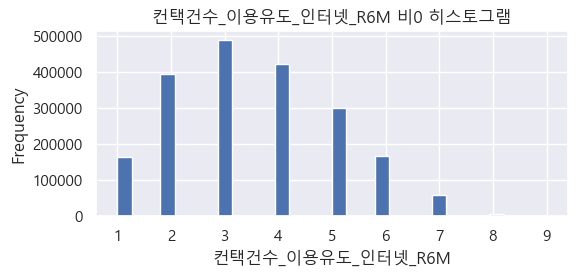

,비0 비율(%)
컨택건수_채권_R6M,5.643467


,컨택건수_채권_R6M 비0 그룹 통계
count,169304.000000
mean,7.594469
median,6.000000
std,5.316962
min,1.000000
max,39.000000


,컨택건수_채권_R6M 비0 비율(%)
Segment,
A,6.995885
B,6.944444
C,7.256055
D,7.070742
E,5.258963


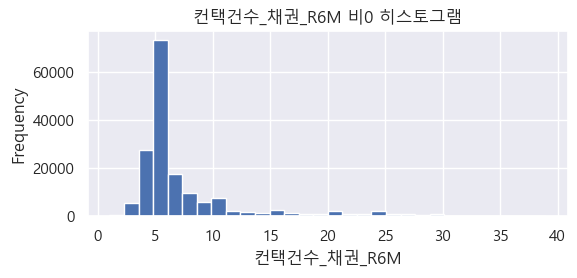

In [3]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in df2.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (df2[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    df2[flag_col] = (df2[orig_col] != 0).astype(int)
    
    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))
    
    # 비0 그룹 통계 요약 출력
    group_stats = df2[df2[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))
    
    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(df2['Segment'], df2[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))
    
    # 비0 값 히스토그램 시각화
    non_zero_values = df2.loc[df2[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()